In [1]:
import pandas as pd

In [16]:
df = pd.read_csv('/content/ksa_points.csv')

# هذه بيانات
# SMAP_L4_SM_lmc_00000000T000000_Vv7031_001.h5
# بعد التنظيف واستخلاص نتائج السعودية فقط

In [3]:
df.sample(10)

,Latitude,Longitude,Elevation,Land_Fraction,Porosity,Sand_Fraction
1534,31.500933,45.046680,13.3997,1.0,0.4279,0.33333
39851,18.865747,52.982370,234.8715,1.0,0.3966,0.86667
17571,26.038157,44.019710,640.7481,1.0,0.4279,0.33333
24125,23.862606,38.978218,374.3725,1.0,0.4232,0.43333
44286,17.455608,48.407677,639.8528,1.0,0.3966,0.86667
20504,25.101160,53.449173,-9999.0000,-9999.0,-9999.0000,-9999.00000
24567,23.708610,36.177387,-9999.0000,-9999.0,-9999.0000,-9999.00000
41389,18.344925,42.339214,2235.2273,1.0,0.4232,0.43333
4462,30.515820,54.009340,1569.0084,1.0,0.5214,0.13333
20348,25.101160,38.884857,552.5976,1.0,0.3890,0.86667


In [4]:
# Remove invalid rows
df = df[(df['Elevation'] != -9999) & (df['Land_Fraction'] != -9999) &
        (df['Porosity'] != -9999) & (df['Sand_Fraction'] != -9999)]


In [6]:
df.shape

(41322, 6)

In [7]:
df.sample(10)

,Latitude,Longitude,Elevation,Land_Fraction,Porosity,Sand_Fraction
2523,31.171450,49.247930,49.7859,1.000000,0.5086,0.26667
28228,22.559195,47.474068,432.5074,1.000000,0.3966,0.86667
6616,29.702318,34.776974,695.3468,1.000000,0.4367,0.36667
858,31.748795,48.034233,24.3514,1.000000,0.5214,0.13333
30140,21.950010,49.714733,186.8128,1.000000,0.3966,0.86667
6885,29.621326,37.857883,715.2568,1.000000,0.4232,0.43333
8741,28.975653,34.870335,151.1822,0.736393,0.4232,0.43333
9226,28.814854,36.084026,706.6710,1.000000,0.3919,0.86667
42210,18.122185,52.889008,362.5555,1.000000,0.3966,0.86667
30148,21.950010,50.461620,161.9308,1.000000,0.3919,0.86667


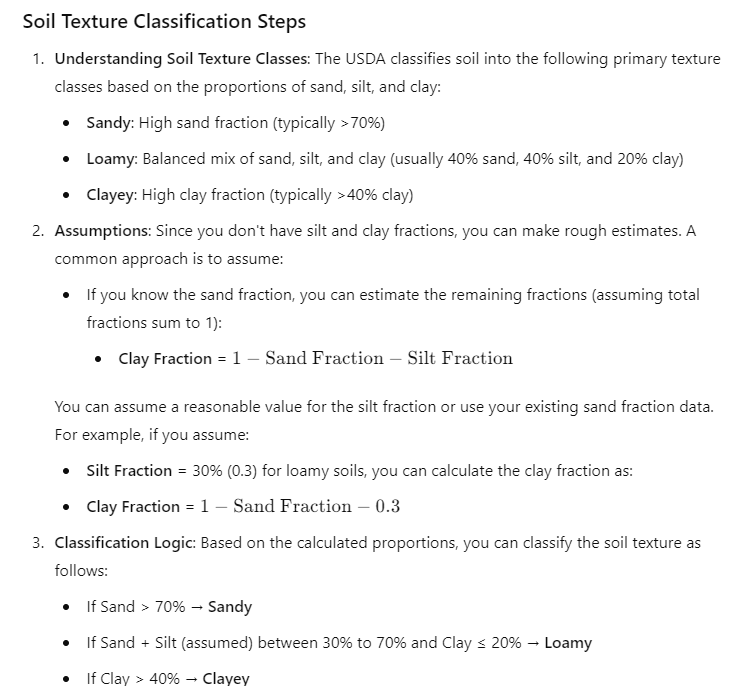

In [11]:
import pandas as pd

# Assuming the filtered DataFrame from your data
df['Silt_Fraction'] = 0.3  # Assumed constant value for silt
df['Clay_Fraction'] = 1 - df['Sand_Fraction'] - df['Silt_Fraction']

def classify_soil_texture(row):
    sand = row['Sand_Fraction']
    clay = row['Clay_Fraction']

    if sand > 0.7:
        return 'Sandy'
    elif sand + row['Silt_Fraction'] >= 0.3 and clay <= 0.2:
        return 'Loamy'
    elif clay > 0.4:
        return 'Clayey'
    else:
        return 'Unclassified'

# Apply classification
df['Soil_Texture'] = df.apply(classify_soil_texture, axis=1)

# Display the DataFrame with soil texture classification
df[['Sand_Fraction', 'Silt_Fraction', 'Clay_Fraction', 'Soil_Texture']]


,Sand_Fraction,Silt_Fraction,Clay_Fraction,Soil_Texture
7,0.43333,0.3,0.26667,Unclassified
8,0.43333,0.3,0.26667,Unclassified
9,0.76667,0.3,-0.06667,Sandy
10,0.76667,0.3,-0.06667,Sandy
11,0.26667,0.3,0.43333,Clayey
...,...,...,...,...
48807,0.86667,0.3,-0.16667,Sandy
48808,0.86667,0.3,-0.16667,Sandy
48809,0.86667,0.3,-0.16667,Sandy
48810,0.83333,0.3,-0.13333,Sandy


In [15]:
counts = df['Soil_Texture'].value_counts()
print(counts)

Soil_Texture
Sandy           21611
Unclassified    15767
Clayey           2592
Loamy            1352
Name: count, dtype: int64
